In [1]:
# Install OpenCV (only once per environment
!pip install opencv-python matplotlib

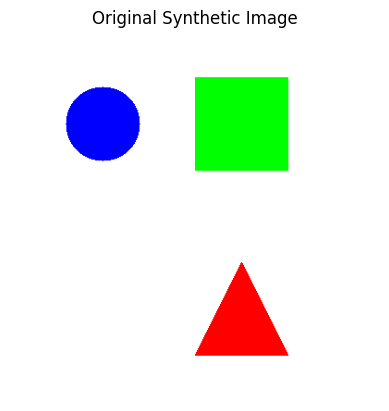

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank white canvas
img = np.ones((400, 400, 3), dtype=np.uint8) * 255

# Draw simple shapes
cv2.circle(img, (100, 100), 40, (255, 0, 0), -1)       # Blue Circle
cv2.rectangle(img, (200, 50), (300, 150), (0, 255, 0), -1)  # Green Rectangle
pts = np.array([[250, 250], [200, 350], [300, 350]], np.int32)
cv2.fillPoly(img, [pts], (0, 0, 255))                   # Red Triangle

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Synthetic Image")
plt.axis('off')
plt.show()


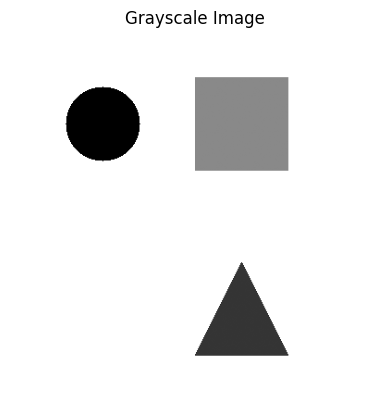

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


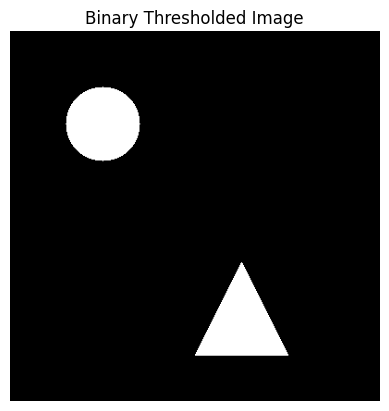

In [7]:
# Convert grayscale to binary
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
plt.title("Binary Thresholded Image")
plt.axis('off')
plt.show()


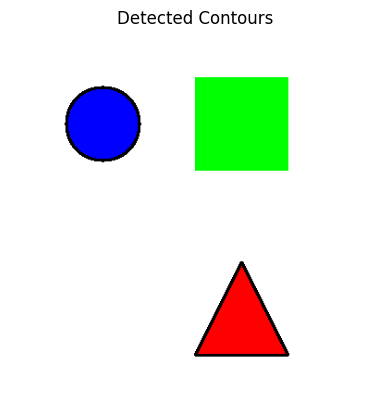

Total contours detected: 2


In [9]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 0, 0), 2)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Detected Contours")
plt.axis('off')
plt.show()

print(f"Total contours detected: {len(contours)}")


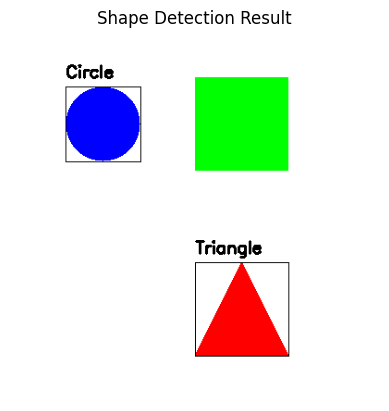

In [11]:
def detect_shape(contour):
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    vertices = len(approx)
    
    if vertices == 3:
        return "Triangle"
    elif vertices == 4:
        return "Rectangle"
    elif vertices > 4:
        return "Circle"
    return "Unknown"

# Annotate image
annotated = img.copy()
for cnt in contours:
    shape = detect_shape(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.putText(annotated, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)
    cv2.rectangle(annotated, (x, y), (x + w, y + h), (0,0,0), 1)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Shape Detection Result")
plt.axis('off')
plt.show()


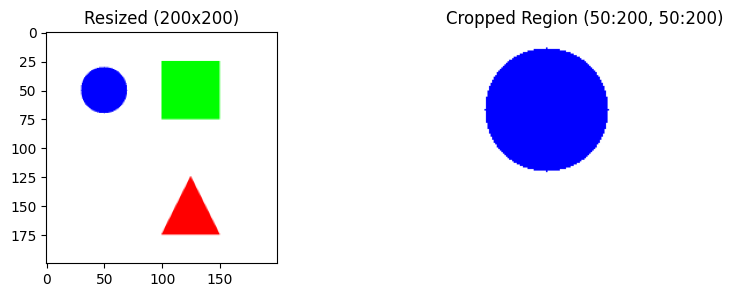

In [13]:
# Resize
resized = cv2.resize(img, (200, 200))

# Crop
cropped = img[50:200, 50:200]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized (200x200)")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Region (50:200, 50:200)")
plt.axis('off')
plt.show()
